# Activity: Explore hypothesis testing

## Introduction

You work for an environmental think tank called Repair Our Air (ROA). ROA is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health. 

They've tasked you with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions. For each, construct a hypothesis test and an accompanying visualization, using your results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

For your analysis, you'll default to a 5% level of significance.

## Step 1: Imports

To proceed with your analysis, import `pandas` and `numpy`. To conduct your hypothesis testing, import `stats` from `scipy`.

#### Import Packages

In [3]:
# Import relevant packages

### YOUR CODE HERE ###
import pandas as pd
import numpy as np
from scipy import stats

You are also provided with a dataset with national Air Quality Index (AQI) measurements by state over time for this analysis. `Pandas` was used to import the file `c4_epa_air_quality.csv` as a dataframe named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** For purposes of your analysis, you can assume this data is randomly sampled from a larger population.

#### Load Dataset

In [43]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
aqi_df = pd.read_csv('c4_epa_air_quality.csv')
aqi_df = aqi.dropna()

## Step 2: Data Exploration

### Before proceeding to your deliverables, explore your datasets.

Use the following space to surface descriptive statistics about your data. In particular, explore whether you believe the research questions you were given are readily answerable with this data.

In [45]:
aqi.shape

(257, 10)

In [47]:
aqi.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


In [49]:
aqi_df.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,257.000000,257,257,257,257,257,257,257,257.000000,257.000000
unique,NaN,1,51,148,188,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,257,66,14,21,2,257,257,NaN,NaN
mean,129.766537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404578,6.782101
std,74.675286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319311,7.091422
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.278947,5.000000
75%,194.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516667,9.000000


AQI distribution


<Axes: >

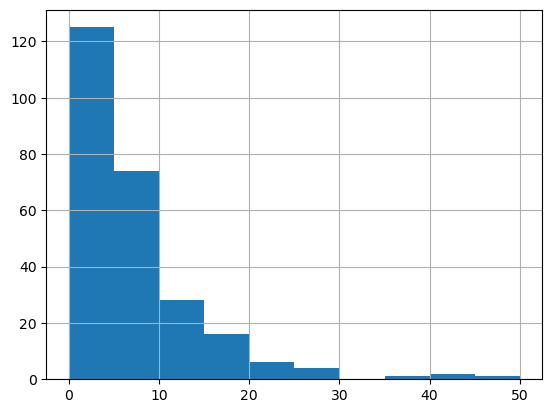

In [51]:
print('AQI distribution')
aqi_df['aqi'].hist()

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referring to the material on descriptive statisics.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider using `pandas` or `numpy` to explore the `aqi` dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

Any of the following functions may be useful:
- `pandas`: `describe()`,`value_counts()`,`shape()`, `head()`
- `numpy`: `unique()`,`mean()`
    
</details>

#### **Question 1: From the preceding data exploration, what do you recognize?**

* 1- The majority of the AQI data is bellow 10
* 2- AQI mean for this dataset is 6.782101

## Step 3. Statistical Tests

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [53]:
# Create dataframes for each sample being compared in your test

Los_Angeles_county_sample = aqi_df[aqi_df['county_name'] == 'Los Angeles'] 
Other_Cali_counties_sample =   aqi_df[(aqi_df['state_name'] == 'California') & (aqi_df['county_name'] != 'Los Angeles')]

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating two dataframes, one for Los Angeles, and one for all other California observations.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

For your first dataframe, filter to `county_name` of `Los Angeles`. For your second dataframe, filter to `state_name` of `Calfornia` and `county_name` not equal to `Los Angeles`.
    
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: There is no difference between Los Angeles county AQI mean and the rest of California.
*   $H_A$: Los Angeles county AQI mean is different than the AQI mean of the rest of all California.


#### Set the significance level:

In [55]:
# For this analysis, the significance level is 5%

significance_level = 0.05

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [57]:
# Compute your p-value here

stats.ttest_ind(a=Los_Angeles_county_sample['aqi'], b= Other_Cali_counties_sample['aqi'], alternative = 'two-sided', equal_var=False)

TtestResult(statistic=2.1107010796372014, pvalue=0.049839056842410995, df=17.08246830361151)

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a two-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_ind()`, a is the aqi column from our "Los Angeles" dataframe, and b is the aqi column from the "Other California" dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  Be sure to set `equal_var` = False.

</details>

#### **Question 2. What is your P-value for hypothesis 1, and what does this indicate for your null hypothesis?**

* With a P-value of 0.049839056842410995 and a Significance Level of 5%, we reject the null hypothesis.
* There is a statistical difference between the AQI mean from LA county and the rest of California.

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [59]:
# Create dataframes for each sample being compared in your test

New_York_sample = aqi_df[aqi_df['state_name'] == 'New York']
Ohio_sample = aqi_df[aqi_df['state_name'] == 'Ohio']

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the materials on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating two dataframes, one for New York, and one for Ohio observations.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

For your first dataframe, filter to `state_name` of `New York`. For your second dataframe, filter to `state_name` of `Ohio`.
    
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses:**

*   $H_0$: The mean AQI of New York is greater than or equal to the mean AQI of Ohio.
*   $H_A$: The mean AQI of New York is lower that the mean AQI in Ohio.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing the sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [61]:
# Computer your p-value here

stats.ttest_ind(a=New_York_sample['aqi'], b= Ohio_sample['aqi'], alternative='less')

TtestResult(statistic=-1.891850434703295, pvalue=0.03654034300840755, df=20.0)

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a two-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_ind()`, a is the aqi column from the "New York" dataframe, an b is the aqi column from the "Ohio" dataframe.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  You can assign `tstat`, `pvalue` to the output of `ttest_ind`. Be sure to include `alternative = less` as part of your code.  

</details>

#### **Question 3. What is your P-value for hypothesis 2, and what does this indicate for your null hypothesis?**

* The P_Value is 0.030 meaning than the null hypothesis can be rejected, since the p-value is lower than the significance level(5%)
* The new regional office can be built on New York

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Can you rule out Michigan from being affected by this new policy?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [63]:
# Create dataframes for each sample being compared in your test
VER curso week 5


NameError: name 'qui_df' is not defined

<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on subsetting dataframes.  
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  Consider creating one dataframe which only includes Michigan.
</details>

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, you are comparing one sample mean relative to a particular value in one direction. Therefore, you will utilize a **one-sample  𝑡-test**. 

#### Compute the P-value

In [20]:
# Computer your p-value here

### YOUR CODE HERE ###


<details>
  <summary><h4><strong>HINT 1</strong></h4></summary>

  Consider referencing the material on how to perform a one-sample t-test.
</details>

<details>
  <summary><h4><strong>HINT 2</strong></h4></summary>

  In `ttest_1samp)`, you are comparing the aqi column from your Michigan data relative to 10, the new policy threshold.
</details>

<details>
  <summary><h4><strong>HINT 3</strong></h4></summary>

  You can assign `tstat`, `pvalue` to the output of `ttest_1samp`. Be sure to include `alternative = greater` as part of your code.  

</details>

#### **Question 4. What is your P-value for hypothesis 3, and what does this indicate for your null hypothesis?**

With a p-value (0.940) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.74), fail to reject the null hypothesis.

Therefore, you cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would not be affected by the new policy.

## Step 4. Results and Evaluation

Now that you've completed your statistical tests, you can consider your hypotheses and the results you gathered.

#### **Question 5. Did your results show that the AQI in Los Angeles County was statistically different from the rest of California?**

*

#### **Question 6. Did New York or Ohio have a lower AQI?**

* 

#### **Question 7: Will Michigan be affected by the new policy impacting states with a mean AQI of 10 or greater?**



* 

# Conclusion

**What are key takeaways from this lab?**
* 

**What would you consider presenting to your manager as part of your findings?**
* 

**What would you convey to external stakeholders?**
* 


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.